In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:
# To Load The Data Set
instagram_df_train=pd.read_csv('"D:\MINI PROJECT\PROJECT\DATA SET\insta_train.csv"')
instagram_df_train

NameError: ignored

In [1]:
# Load the testing data
instagram_df_test= pd.read_csv('"D:\MINI PROJECT\PROJECT\DATA SET\insta_test.csv"')
instagram_df_test

NameError: ignored

In [ ]:
instagram_df_train.head()
instagram_df_train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
instagram_df_test.head()
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [ ]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

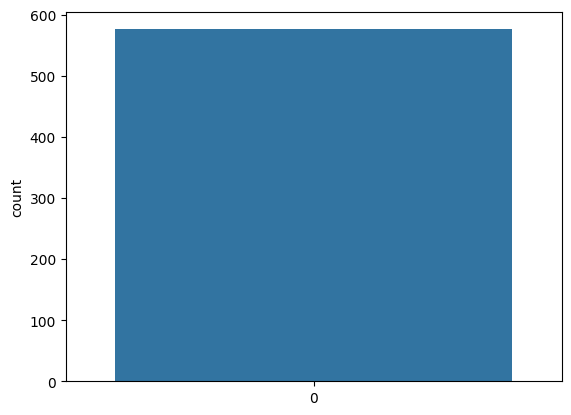

In [ ]:
sns.countplot(instagram_df_train['fake'])
plt.show()

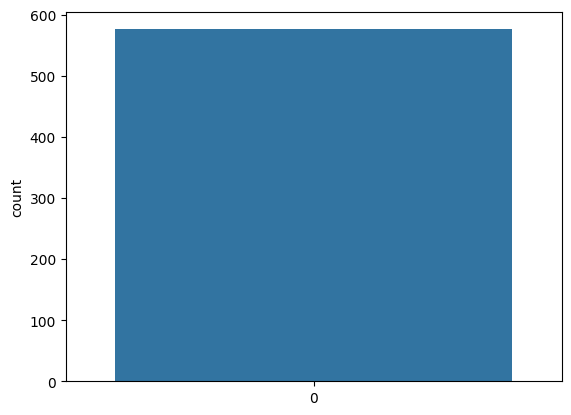

In [ ]:
sns.countplot(instagram_df_train['private'])
plt.show()

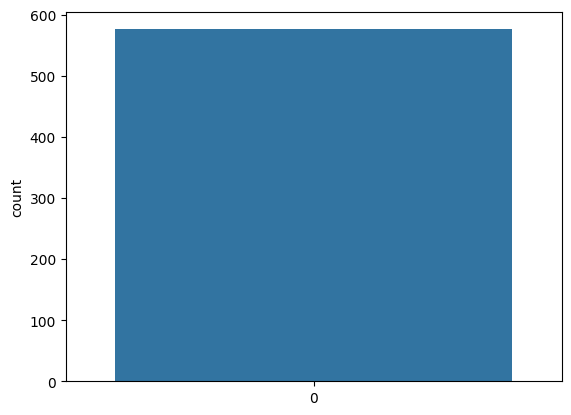

In [ ]:
sns.countplot(instagram_df_train['profile pic'])
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
sns.hertplot(instagram_df_train['nums/length username'])
plt.show()

NameError: ignored

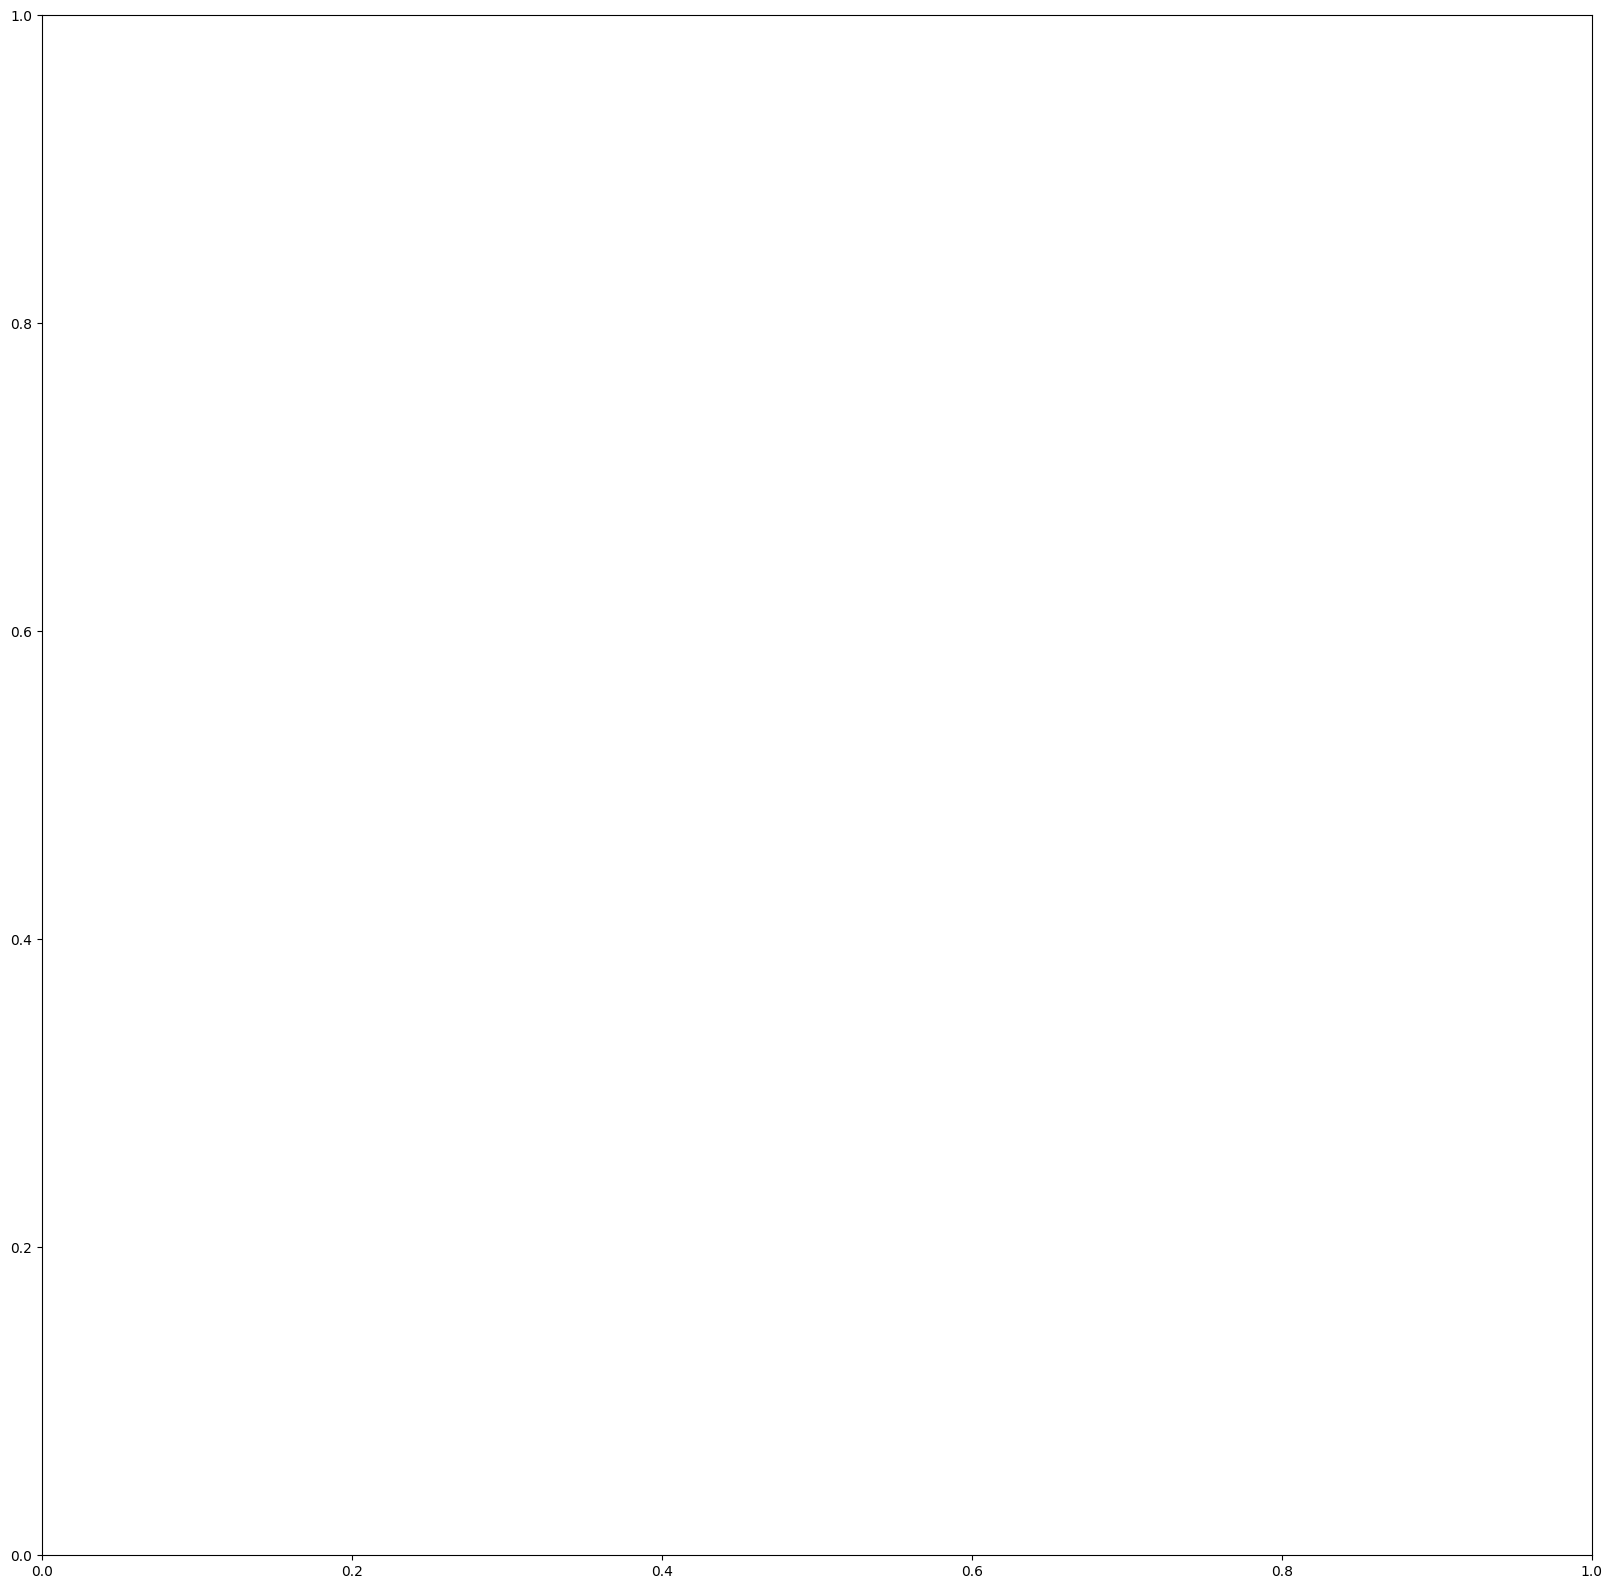

In [ ]:
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()

In [ ]:
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

<Axes: ylabel='count'>

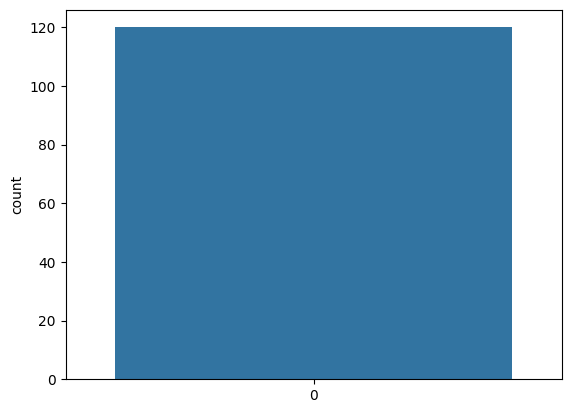

In [ ]:
sns.countplot(instagram_df_test['fake'])

<Axes: ylabel='count'>

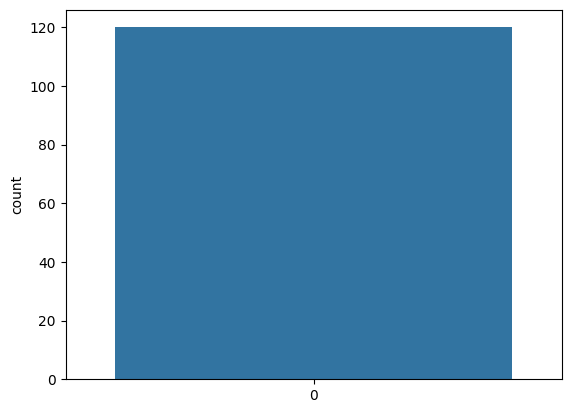

In [ ]:
sns.countplot(instagram_df_test['private'])

<Axes: ylabel='count'>

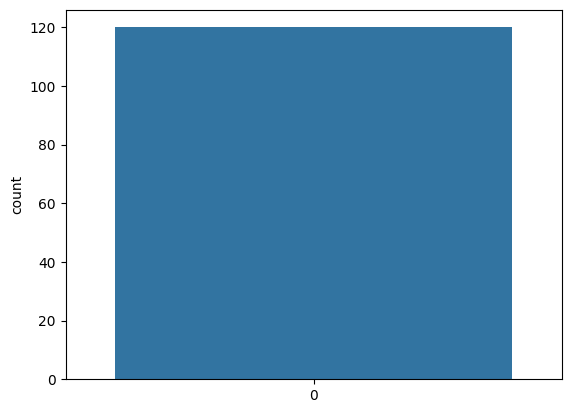

In [ ]:
sns.countplot(instagram_df_test['profile pic'])

In [ ]:
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
X_test

y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

y_train

y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

y_train

y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data


17.24137931034483

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Epoch 1/50
17/17 [==============================] - 1s 16ms/step - loss: 0.6137 - accuracy: 0.7027 - val_loss: 0.5612 - val_accuracy: 0.7759
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.8340 - val_loss: 0.1825 - val_accuracy: 0.9310
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.8938 - val_loss: 0.2225 - val_accuracy: 0.8966
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.8919 - val_loss: 0.2040 - val_accuracy: 0.8966
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.9015 - val_loss: 0.1325 - val_accuracy: 0.9138
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9015 - val_loss: 0.1759 - val_accuracy: 0.8966
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9151 - val_loss: 0.1821 - val_accuracy: 0.8966
Epoch 8/50
17/17 [=

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                600       
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 25)                3775      
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_8 (Dense)             (None, 25)                650       
                                                                 
 dropout_5 (Dropout)         (None, 25)               

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                600       
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 25)                3775      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 dropout_8 (Dropout)         (None, 25)               

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


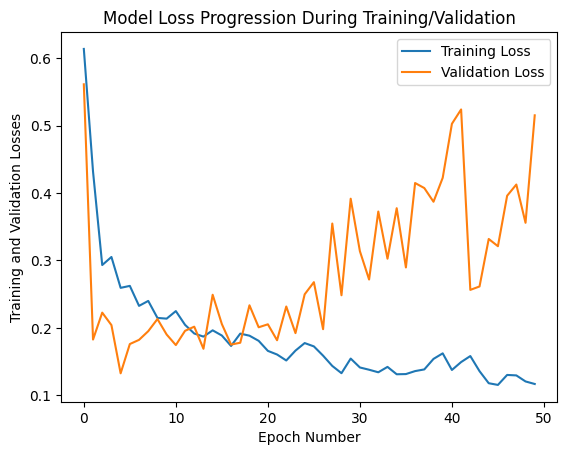

In [ ]:
print(epochs_hist.history.keys())

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.40      0.03      0.06        60
           1       0.50      0.95      0.65        60

    accuracy                           0.49       120
   macro avg       0.45      0.49      0.36       120
weighted avg       0.45      0.49      0.36       120



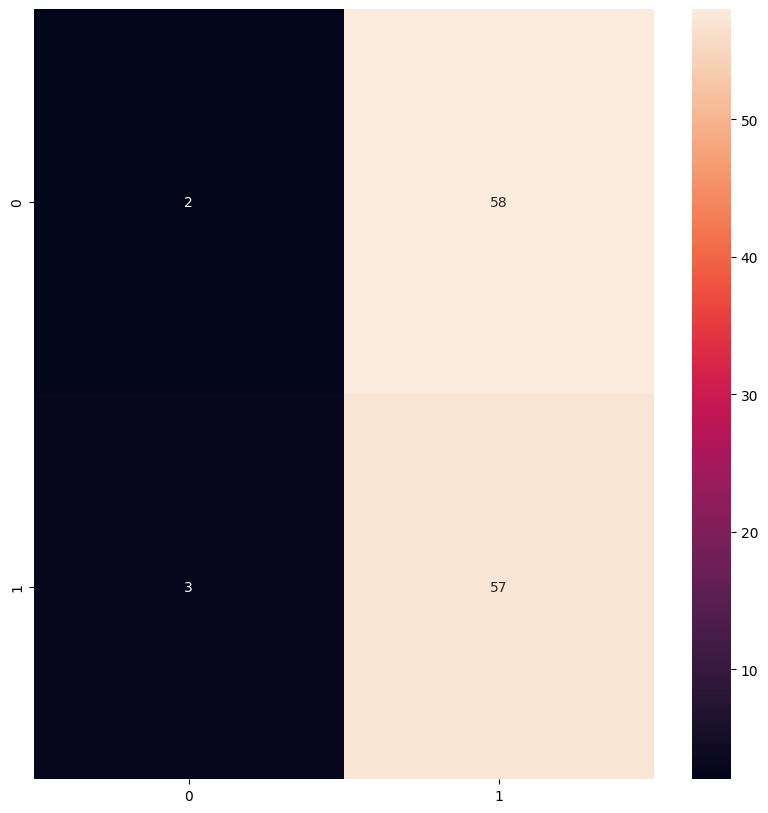

In [ ]:
predicted = model.predict(X_test)

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

print(classification_report(test, predicted_value))

plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()